In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split


## Import the Data

In [5]:
dataset = pd.read_csv('wine_data.csv')
dataset.head(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,price
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,41.60240
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,39.69820
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,56.33980
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,46.59496
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,56.09676
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,54.98428


## Explore the Data

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
price                   1599 non-null float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


In [11]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,price
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,54.960346
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,6.246348
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,38.502400
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,50.041750
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,53.491000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,58.891900
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,77.975100


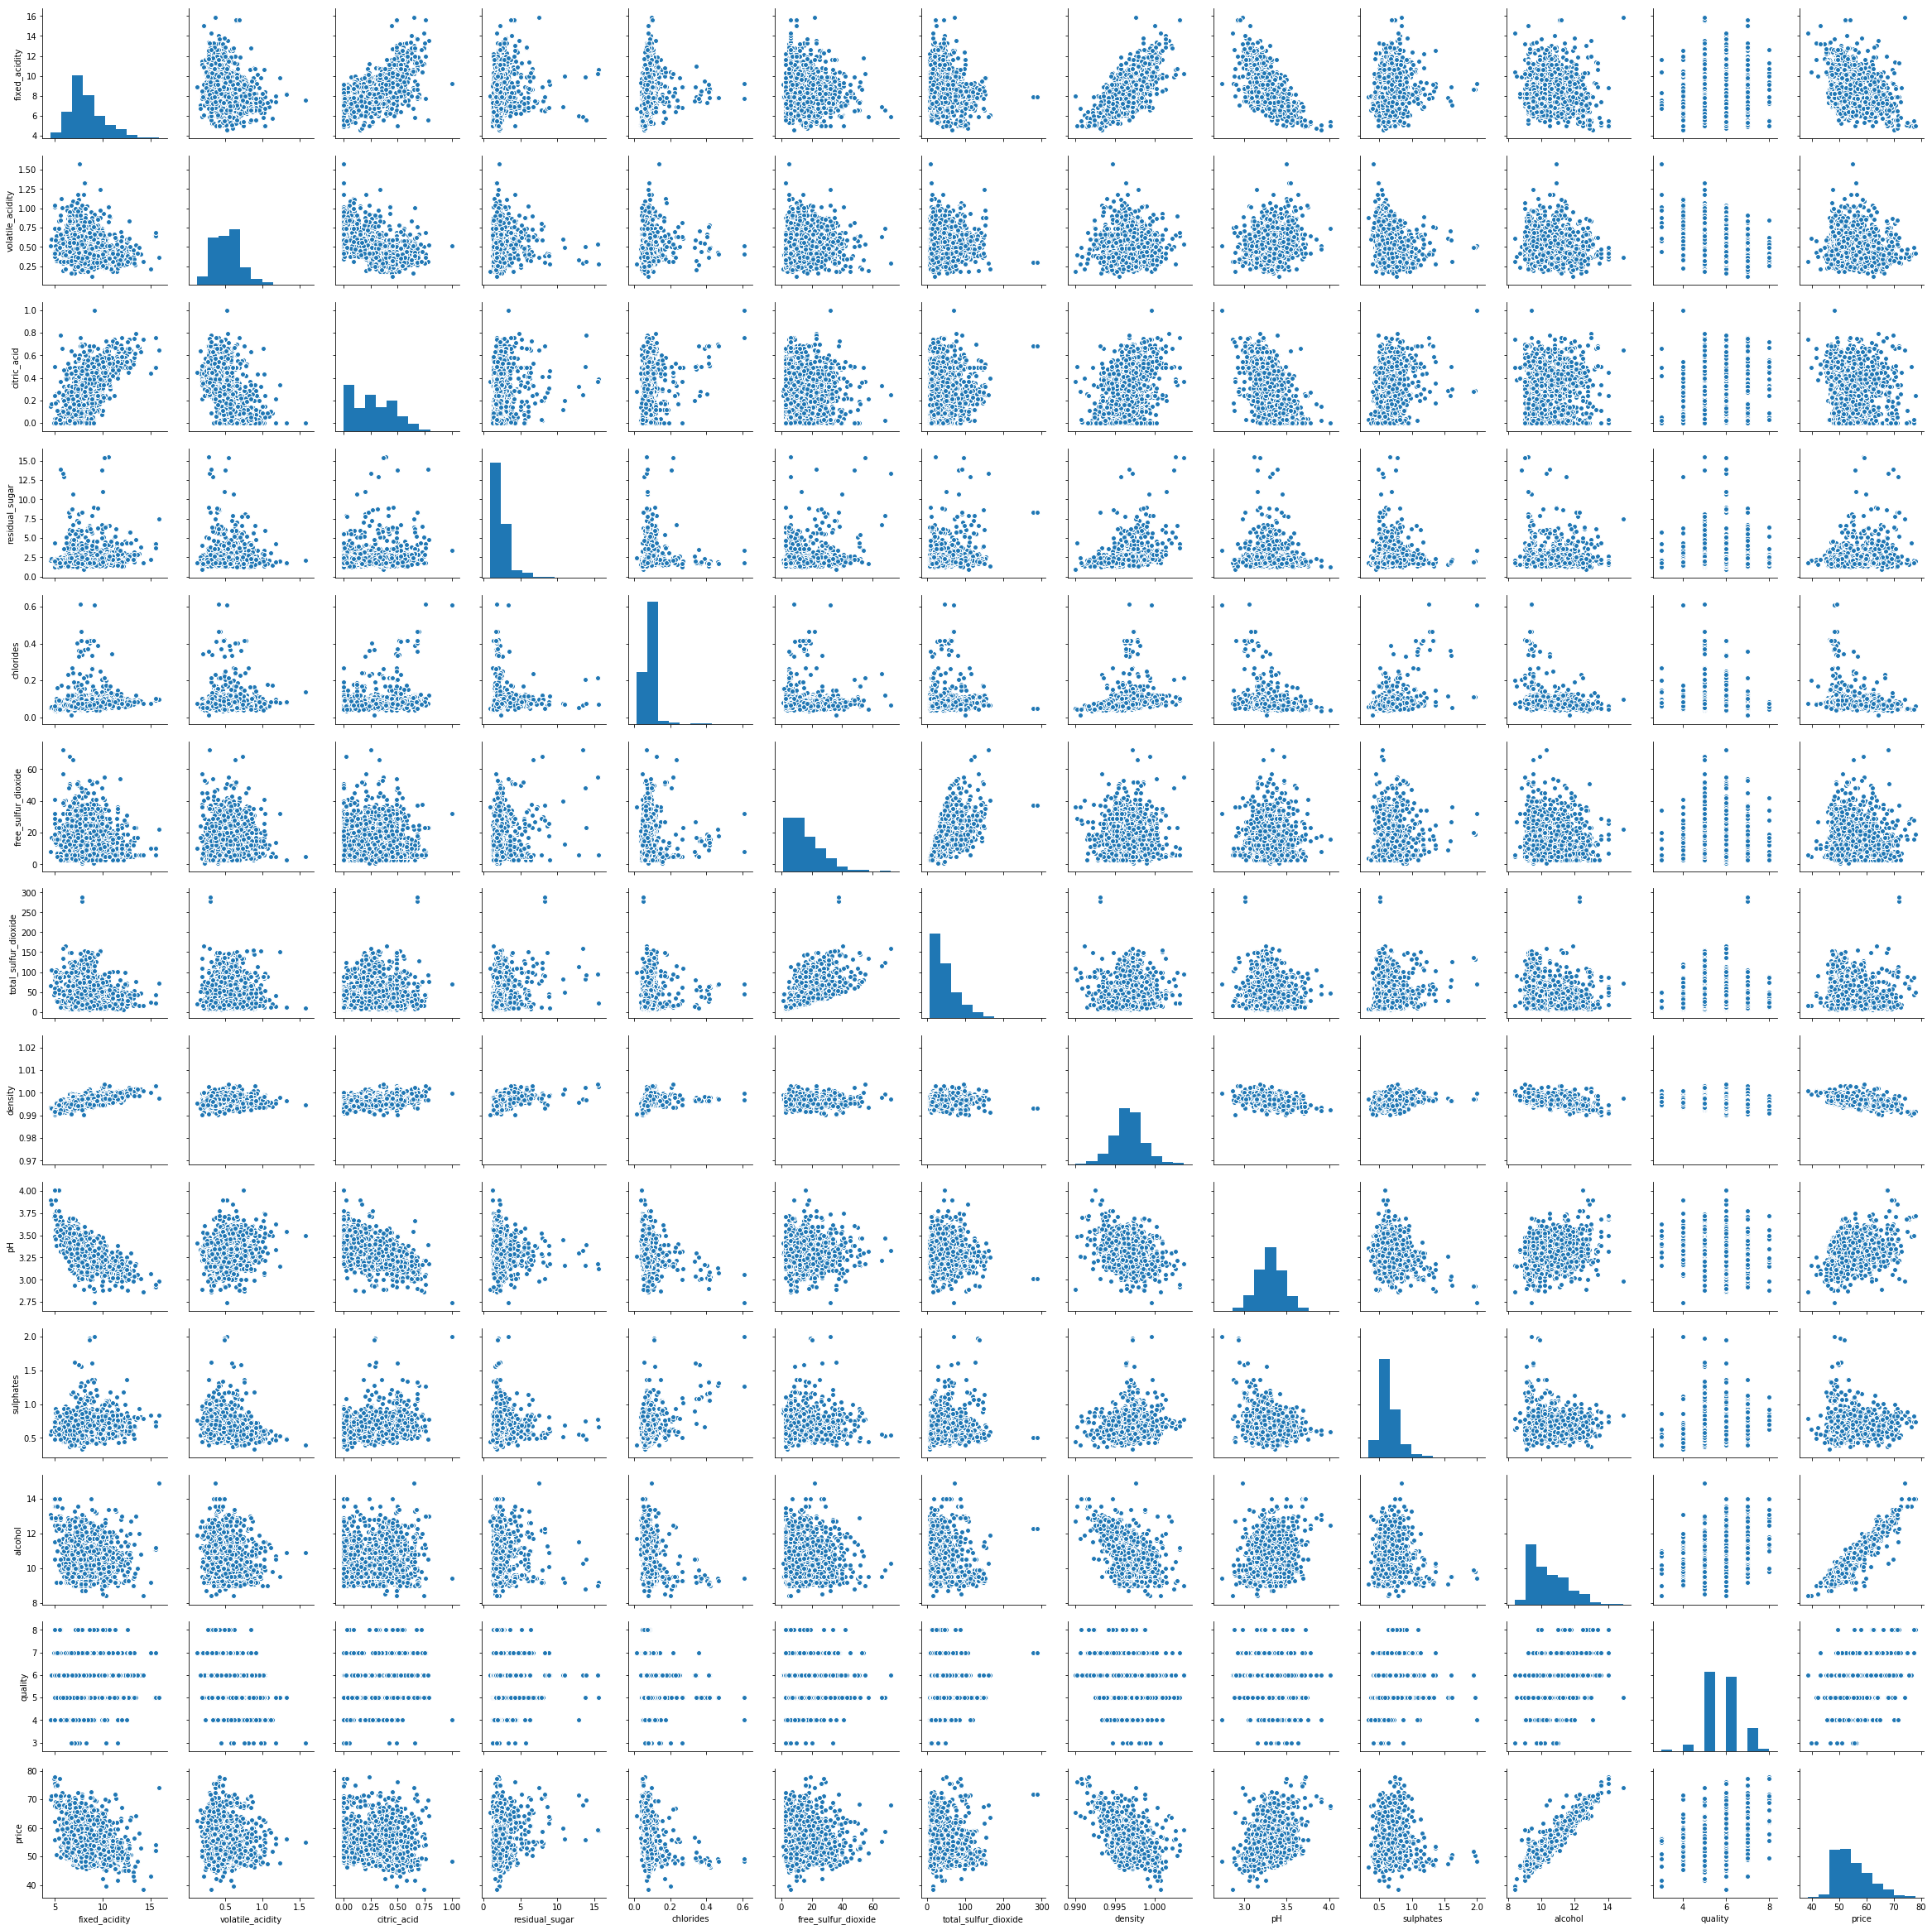

In [13]:
## Shift Tab give you options for a function
## Plot all variables vs. one another
sns.pairplot(dataset)

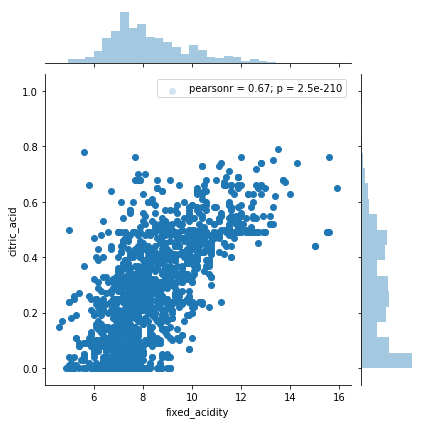

In [8]:
sns.jointplot(x="fixed_acidity", y="citric_acid", data=dataset)

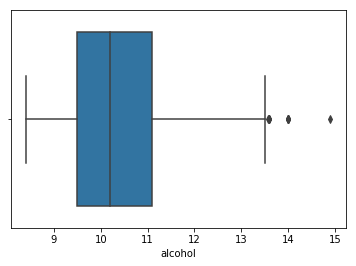

In [16]:
##sns.boxplot(x=dataset)

sns.boxplot(x='alcohol', data=dataset)

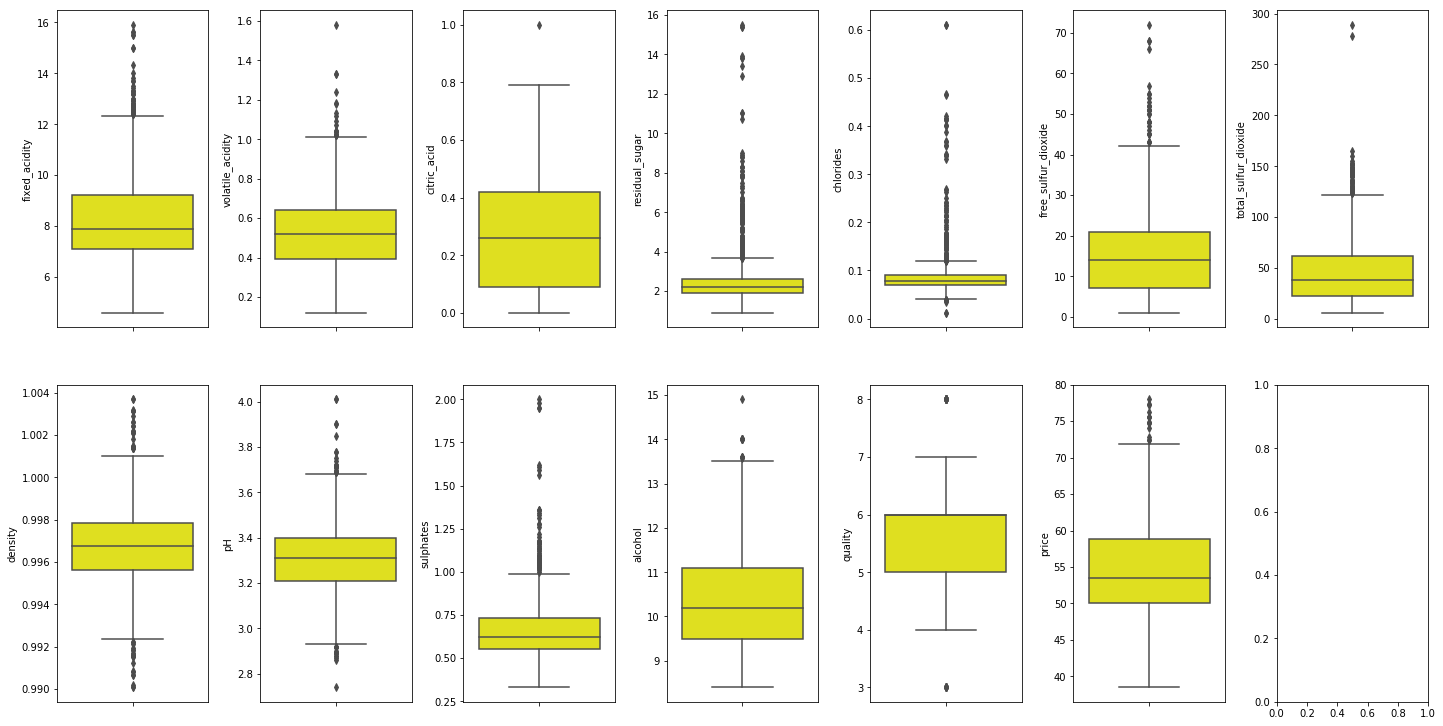

In [19]:
## Best library for models (Scientific Python)
## Visualise all the data in box plots to look for outliers
from scipy import stats
fig, axs = plt.subplots(ncols=7,
                       nrows = 2,
                       figsize = (20,10))
index = 0
axs = axs.flatten()

for names, values in dataset.items(): 
        sns.boxplot(y = names, data=dataset,
                   ax=axs[index],
                   color = 'yellow')
        index += 1

plt.tight_layout(pad = 0.4, w_pad=0.5, h_pad =5.0)

## Start Working with Correlations

In [21]:
corr = dataset.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,price
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,-0.288792
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.151206
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.031472
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.231717
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.218691
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.019312
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.121920
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.550981
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,0.338676
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.062713


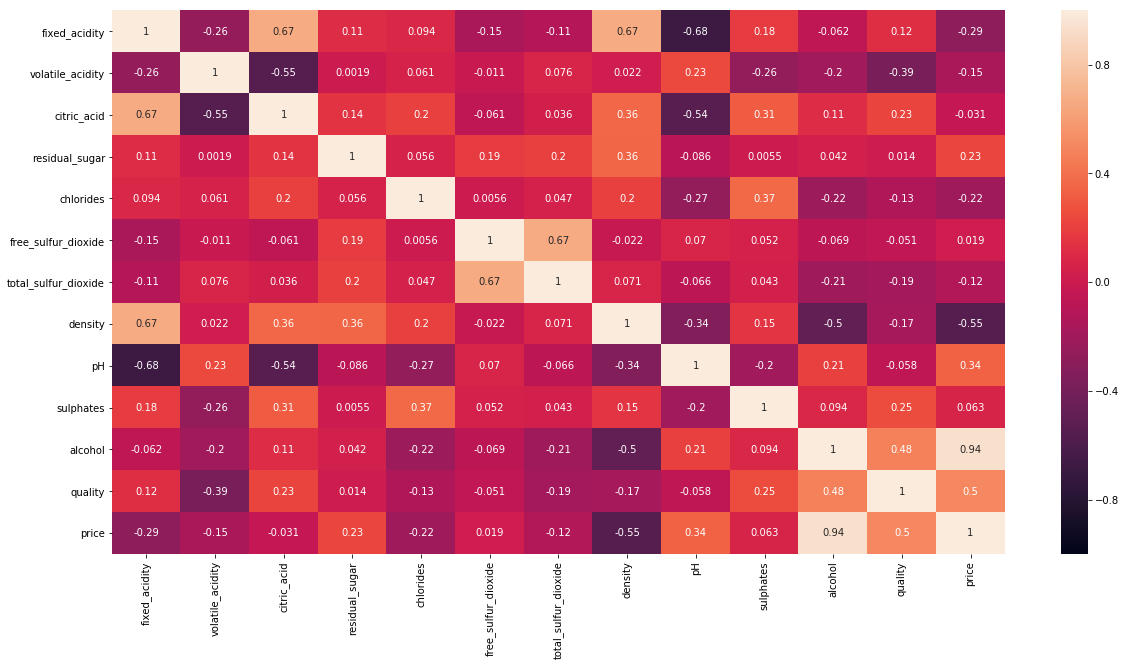

In [29]:
plt.figure(figsize = (20,10))
ax1=sns.heatmap(corr, vmin=-1, vmax=1, annot = True)

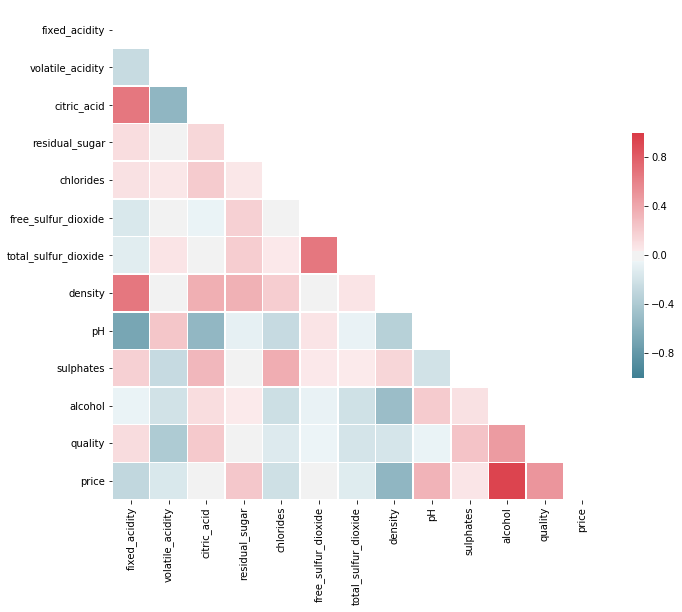

In [30]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Model

In [33]:
X = dataset[['alcohol']]
y = dataset[['price']]

## Create Variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state = 123)


In [36]:
y_train.head()

,price
502,58.38920
585,48.68482
258,52.89250
1486,57.28698
831,54.98920


In [38]:
# Create a linear regression using sklearn

regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#Evaluate the model
print('R-squared is:', regression_model.score(X_train, y_train))

R-squared is: 0.8797167494465248


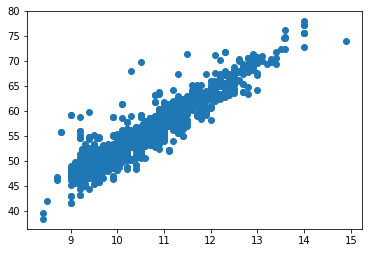

In [44]:
plt.scatter(x='alcohol', y='price', data=dataset)

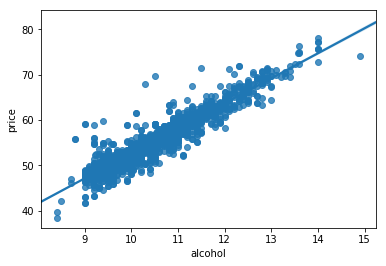

In [45]:
sns.regplot(x='alcohol', y='price', data=dataset)

In [46]:
y_pred = regression_model.predict(X_test)


## RMSE

In [50]:
# diff = y_test - y_pred
# diff_sq = diff**2
# mean_diff_sq = diff_sq.mean()
# RMSE = np.sqrt(mean_diff_sq)
# RMSE

rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

price    2.064766
dtype: float64